# Lineer (Doğrusal) Regresyon

Regresyon analizi aralarında sebep-sonuç ilişkisi bulunan iki veya daha fazla değişken arasindak ilişkiyi kullanarak o konu ile ilglili ***tahmin*** yapmak için kullanılır.

### Regresyon Çeşitleri
Çok çeşit lineer regresyon modelli bulunmaktadır. En fazla kullanılan modeller aşağıda ki gibidir

1) *Basit Doğrusal* Regresyon
2) *Çoklu Doğrusal* Regresyon
3) *Polinom* Regresyon
4) *Lojistik* Regresyon

-------------------------

#### 1) Basit Doğrusal Regresyon
Basit lineer regresyon bağımlı bir değişkene karşılık bağımsız bir değişkeni olan fonksiyonlardır. Bağımlı değişkene göre bağımsız değişkenin nasıl değiştiğini tahmin etmeye çalışırız. Değişkenler arasında yaklaşık olarak doğrusal bir ilişki olduğunu varsayarız.

**Örneğin:** Evin metrekaresine göre fiyatını tahmin etme. Metrekare burada *bağımsız değişken (X)*, fiyat ise *bağımlı değişken (y)* 

#### Basit Doğrusal Regresyon Hipotezi

y = a + bx

Burada: 
- y, bağımlı değişken (tahmin etmeye çalıştığımız değişken)
- x, bağımsız değişken (girdi değişkeni)
- b, eğim (regresyon katsayısı), doğrunun eğimini temsil eder
- a, kesme noktası (kesme terimi), doğrunun y-eksenini kestiği noktayı temsil eder

![figur](./Img/LineerReg/BasitLineer.png)


#### Basit Doğrusal Regresyon Hipotezi Bulma

Basit doğrusal regresyon hipotezini bulmanın birden fazla yolu vardır. Bunlardan bir tanesi *matris yöntemi*, öteki ise *gradient descent* yöntemidir.

Bu iki yöntem de ***Kare hata fonksiyonunu (MSE)*** minimize etmeye çalışır. MSE yerine maliyet fonksiyonu da denebilir.

##### Nedir bu kare hata fonksiyonu ?

Kareler hatası (Mean Squared Error, MSE) denklemi, gerçek ve tahmin edilen değerler arasındaki farkların karelerinin ortalaması olarak ifade edilir. Şu şekilde yazılır:

MSE = (1/n) * Σ(yᵢ - ŷᵢ)²

Burada:

- n, veri noktalarının sayısı
- yᵢ, gerçek değerler
- ŷᵢ, modelin tahmin ettiği değerler

Yani kareler hatası dediğimiz şey tahmin ettiğimiz değerden gerçek değeri çıkartıp karesini alma işlemidir. Kareler hatası ne kadar küçük olursa modelimiz o kadar doğru sonuçlar verir.

##### Kare hata fonksiyonu minimize etme

Kare hata fonksiyonumuzu minimize etmek için **regresyon katsayısı** ve **kesme noktası** değerlerini en doğru şekilde bulmamız gerekli. İşte bu kısımda karşımıza Matris yöntemi ve gradient descent yöntemi çıkıyor. İki yöntemle ilgili kaynaklar.


[Matris Yöntemi](https://online.stat.psu.edu/stat462/node/132/)
[Gradient descent](https://www.geeksforgeeks.org/gradient-descent-in-linear-regression/)

Matris yöntemi ile direkt olarak katsayıları bulabiliriz *(yukarıda ki a ve b değerleri)*. Grandient Descent yöntemi ile maliyet fonksiyonunu en aza indiricek katsayıları *(yukarıda ki a ve b değerleri)* adım adım buluruz. 

------------------

# Örnek Çalışma

In [2]:
# Kütüphane Yükleme 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [14]:
#Veriyi setini yükleme

dataFrame = pd.read_csv('Dataset/Salary_dataset.csv')

dataFrame.head(10)

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


In [15]:
#Veriyi düzenleme

dataFrame.drop('Unnamed: 0', axis = 1, inplace = True)
dataFrame.rename(columns = {'YearsExperience': 'Çalışma Süresi', 'Salary': 'Maaş'}, inplace = True)

dataFrame.head(10)

,Çalışma Süresi,Maaş
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


Burada Maaş sütunu bağımlı değişken, Çalışma Süresi sütunu ise bağımsız değişkendir.

In [36]:
X = dataFrame['Çalışma Süresi'].values
y = dataFrame['Maaş'].values

Text(0, 0.5, 'Maaş')

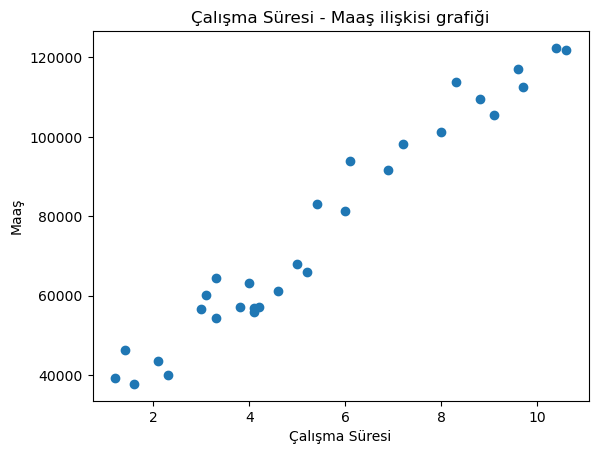

In [37]:
# Maaş ile çalışma süresi arasında ki ilişki

plt.scatter(X,y)
plt.title('Çalışma Süresi - Maaş ilişkisi grafiği')
plt.xlabel('Çalışma Süresi')
plt.ylabel('Maaş')


Çalışma süresi ile maaş arasında lineer bir ilişki görülüyor.

## Eğitim ve Test Verisi ayrımı
Amacımız, yeni verilere iyi genelleyen bir model oluşturmaktır. Test setimiz yeni veriler için bir temsilci görevi görür. Eğitim verileri ile doğrusal regresyon algoritmasını uygular ve modeli oluştururuz. Modelin başarısını denetleyebilmemiz için test verilerini kullanılır. Veri setini eğitim-test olarak bölme işi aşağıdaki gibidir:

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state= 1)


Yukarıdaki kod parçacığından, verilerin% 40'ının test verilerine gittiği ve geri kalanının eğitim setinde kaldığı sonucuna varabiliriz.

## Modeli Oluşturma ve Eğitme

In [40]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train.reshape(-1,1),y_train)

LinearRegression()

## Modelin Tahminleri

Test setini modele vererek tahminleri alıcaz ve ne kadar başarılı olduğunu görücez !

In [44]:
y_pred = lin_reg.predict(X_test.reshape(-1,1))

Modelin tahminlerini görselleştirme ve Regresyon çizgisi

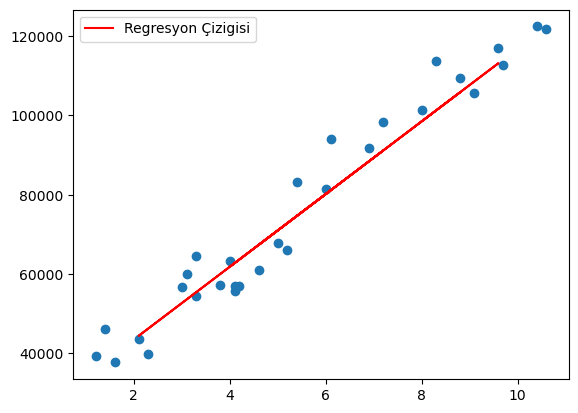

In [50]:
plt.scatter(X,y)
plt.plot(X_test,y_pred, color = 'Red', label = 'Regresyon Çizigisi')
plt.legend()

-------------------
Regresyon denklemi katsayıları ve Regresyon Denklemi

In [42]:
print(f"Eğim(b):{lin_reg.coef_[0]:.2f}")
print(f"Kesme Noktası(a):{lin_reg.intercept_:.2f}")
print(f"Regresyon Eğirisi: y = {lin_reg.intercept_:.2f} + {lin_reg.coef_[0]:.2f}x ")

Eğim(b):9158.14
Kesme Noktası(a):25222.43
Regresyon Eğirisi: y = 25222.43 + 9158.14x 


In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print(f"R-Kare hatası: {r2_score(y_test,y_pred)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")


R-Kare hatası: 0.9240850478446321
MAE: 5049.818093659744
MSE: 37496296.6187984


## Çoklu Lineer Regresyon

Çoklu doğrusal regresyon (multiple linear regression), bir bağımlı değişkenin (sonuç değişkeni) birden fazla bağımsız değişkene (özellik veya öznitelik) bağlı olduğu bir regresyon analizi türüdür. Basit doğrusal regresyonda yalnızca bir bağımsız değişken kullanılırken, çoklu doğrusal regresyonda birden fazla bağımsız değişken kullanılır.

**Örneğin:** Bir çocuğun cinsiyetine yaşına ve kilosuna göre boyunu tahmin etmeye çalışmak.



#### Çoklu Lineer Regresyon Hipotezi

y = a + bx_1 + cx_2 + .... + nx_n


Burada: 
- y, bağımlı değişken (tahmin etmeye çalıştığımız değişken)
- x_n, bağımsız değişkenler
- (b, c, n ..), eğim (regresyon katsayısı), doğrunun eğimini temsil eder
- a, kesme noktası (kesme terimi), doğrunun y-eksenini kestiği noktayı temsil eder

![figur](./Img/LineerReg/MultipleLineer.jpg)


#### Çoklu Lineer Regresyon Hipotezi Bulma
Basit lineer regresyon modelinde olduğu gibi, çoklu lineer regresyon modelinide bulmak için *matris yöntemi* veya *gradient descent* yöntemi kullanılabilir.

----------------


# Örnek Çalışma

In [34]:
# Kütüphane Yükleme 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
dataset = pd.read_csv('.\Dataset\Sirketler_Kar_Bilgileri.csv')

In [36]:
dataset.head(10)

,ArgeHarcamasi,YonetimGiderleri,PazarlamaHarcamasi,Sehir,Kar
0,165349.20,136897.80,471784.10,Istanbul,192261.83
1,162597.70,151377.59,443898.53,Ankara,191792.06
2,153441.51,101145.55,407934.54,Kocaeli,191050.39
3,144372.41,118671.85,383199.62,Istanbul,182901.99
4,142107.34,91391.77,366168.42,Kocaeli,166187.94
5,131876.90,99814.71,362861.36,Istanbul,156991.12
6,134615.46,147198.87,127716.82,Ankara,156122.51
7,130298.13,145530.06,323876.68,Kocaeli,155752.60
8,120542.52,148718.95,311613.29,Istanbul,152211.77
9,123334.88,108679.17,304981.62,Ankara,149759.96


#### Veriyi düzenleme

Şehir kategorik bir değerdir. Algoritmanın kullanabilmesi için bu kategorik değerleri Numeric değerlere çevirmemeiz gerekli.

Numeric değerlere çevirdikten sonra kukla değişkenler oluşturmamız gerekli. Kukla değişken bir değişkeni ifade eden başka bir değişken olarak ifade edilebilir. Fakat aynı şeyi ifade eden kolonların aynı anda kullanılması risklidir. Çünkü her kolonun algoritma üzerinde bir etkisi vardır.

**Örneğin:** 1 veriyi ifade eden 100 kolon varsa bu 100 kolon geriye kalan kolonların etkisini azaltmış olur. Her kolon sonucu kendi yönünde çekmeye çalışır. 1 tane veriyi 100 kolonla ifade edersek algoritmamız sadece o veriye duyarlı hale gelebilir. Bu duruma ***Kukla değişken tuzağı*** denir.


[Dummy Variable](https://tr.wikipedia.org/wiki/Kukla_de%C4%9Fi%C5%9Fken_tuza%C4%9F%C4%B1)

In [37]:
#Kategorik olan şehir verisini numeric yapma

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

onehotencoder = OneHotEncoder()
encoded_features = onehotencoder.fit_transform(dataset[['Sehir']]).toarray()


dataset = pd.concat([pd.DataFrame(encoded_features),dataset.drop('Sehir', axis = 1)], axis = 1)

- M1=0 M2=1 M3=0 - İstanbul
- M1=1 M2=0 M3=0 - Ankara
- M1=0 M2=0 M3=1 - Kocaeli
- M1=0 M2=1 M3=0 - Istanbul

In [38]:
dataset.head(5)

,0,1,2,ArgeHarcamasi,YonetimGiderleri,PazarlamaHarcamasi,Kar
0,0.0,1.0,0.0,165349.20,136897.80,471784.10,192261.83
1,1.0,0.0,0.0,162597.70,151377.59,443898.53,191792.06
2,0.0,0.0,1.0,153441.51,101145.55,407934.54,191050.39
3,0.0,1.0,0.0,144372.41,118671.85,383199.62,182901.99
4,0.0,0.0,1.0,142107.34,91391.77,366168.42,166187.94


In [39]:
# Veriyi ayırma

X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,6].values
pd.DataFrame(X).head(5)

,0,1,2,3,4,5
0,0.0,1.0,0.0,165349.20,136897.80,471784.10
1,1.0,0.0,0.0,162597.70,151377.59,443898.53
2,0.0,0.0,1.0,153441.51,101145.55,407934.54
3,0.0,1.0,0.0,144372.41,118671.85,383199.62
4,0.0,0.0,1.0,142107.34,91391.77,366168.42


-------------------------

İlk kolonu yani Ankara olma durumunuda düşürücez. Çünkü diğer 2 sütuna göre Ankara olup olmadığını anlayabiliriz. Örneğin Ankara olursa diğer 2 sütun 0 olucak veya diğer 2 sütundan herhangi bir tanesi 1 olursa Ankara olmadığını anlamış olucaz.

------------------------

In [40]:
X = X[:, 1:]
pd.DataFrame(X).head(5)

,0,1,2,3,4
0,1.0,0.0,165349.20,136897.80,471784.10
1,0.0,0.0,162597.70,151377.59,443898.53
2,0.0,1.0,153441.51,101145.55,407934.54
3,1.0,0.0,144372.41,118671.85,383199.62
4,0.0,1.0,142107.34,91391.77,366168.42


## Eğitim ve Test Verisi ayrımı

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Çoklu lineer model oluşturma ve eğitme

In [52]:
from sklearn.linear_model import LinearRegression

multi_reg = LinearRegression()
multi_reg.fit(X_train, y_train)

LinearRegression()

## Modelin Tahminleri

Test setini modele vererek tahminleri alıcaz ve ne kadar başarılı olduğunu görücez !

In [53]:
y_pred = multi_reg.predict(X_test)

Model tahminlerini görselleştirme ve model performansı 

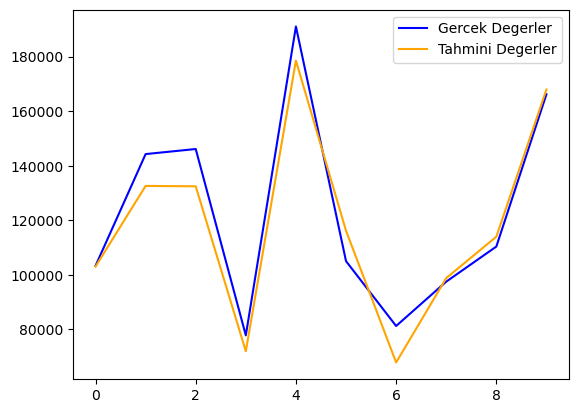

In [45]:
plt.plot(y_test, color = 'blue', label = 'Gercek Degerler')
plt.plot(y_pred, color = 'orange', label = 'Tahmini Degerler')
plt.legend()

In [71]:
print(f"Kesme Noktası(a):{multi_reg.intercept_:.2f}")
print(f"Regresyon Eğirisi: y = {multi_reg.intercept_:.2f} + {multi_reg.coef_[0]:.2f}x_1 + {multi_reg.coef_[1]:.2f}x_2 + {multi_reg.coef_[2]:.2f}x_3 + {multi_reg.coef_[3]:.2f}x_4 + {multi_reg.coef_[4]:.2f}x_5 ")

Kesme Noktası(a):42554.17
Regresyon Eğirisi: y = 42554.17 + 699.37x_1 + -959.28x_2 + 0.77x_3 + 0.03x_4 + 0.04x_5 


In [72]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print(f"R-Kare hatası: {r2_score(y_test,y_pred)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")


R-Kare hatası: 0.9347068473281129
MAE: 7514.293659641384
MSE: 83502864.03274305
